In [1]:
import numpy as np, curvedsky, prjlib, plottools as pl, tools_y, binning as bn, tools_qrec, pickle, analysis as ana
from scipy.signal import savgol_filter
from matplotlib.pyplot import *

In [2]:
from matplotlib import rc
rc('text', usetex=True)

In [3]:
fltr='cinv'
ytype='nilc'
mtype=0
dtype='dr2_smica'
cmask='Lmask'
form='{:.2f}'
mb = bn.multipole_binning(10,lmin=1,lmax=2048)
p = prjlib.init_analysis(dtype=dtype,fltr=fltr,wtype=cmask)
qobj = {}
qobj['normal'], __, __, qobj['lens'], qobj['lens-src'] = tools_qrec.init_quad(p.ids,p.stag,rlmin=100,rlmax=2048)
cy = tools_y.init_compy(p.ids,masktype=mtype,ytype=ytype,ascale=1.0)

chi: -2.9 , chi (sim mean): 0.0 , chi (sim std): 3.6 , PTE: 0.34 (nilc,0)
chi^2: 14.8 , chi^2 (sim): 11.2 , PTE: 0.19 (nilc,0)


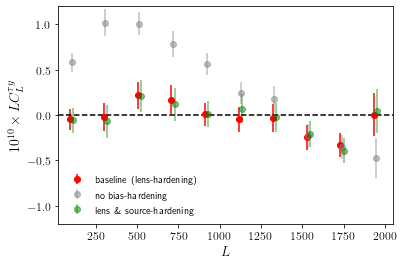

In [4]:
pl.plot_1dstyle(ymin=-1.2,ymax=1.2,ylab=r'$10^{10}\times LC_L^{\tau y}$',usetex=True,yticks=[-1.,-.5,0.,.5,1.],yticks_labsize=12,xticks_labsize=12)
s = 1e10*mb.bc
for i, (bh, Lab, co, alpha) in enumerate([('lens',r'baseline (lens-hardening)','r',1.),('normal',r'no bias-hardening','grey',.5),('lens-src',r'lens \& source-hardening','g',.5)]):
    al = (np.loadtxt(qobj[bh].f['TT'].al)).T[1]
    yy = savgol_filter( (np.loadtxt(cy.fclyy)).T[1], 51, 3)
    vl = np.sqrt(al*yy)/np.sqrt(qobj[bh].l+1e-30)
    fx = tools_y.init_cross(qobj[bh],cy,p.ids,p.stag)
    mcb, vcb, scb, ocb = bn.binned_spec(mb,fx.xl,cn=1,opt=True,vl=vl)
    errorbar(mb.bc+i*10-10,s*ocb,yerr=s*vcb,fmt='o',color=co,alpha=alpha,label=Lab)
axhline(0.,color='k',ls='--')
st = ana.PTEs(ocb,scb,comment=ytype+','+str(mtype),x1pte=True)
#figtext(.2,.20,r'ymap:'+ytype+','+str(mtype))
#figtext(.2,.25,r'tau:'+dtype+','+str(cmask))
#figtext(.2,.35,r'$\chi$-PTE:'+str(form.format(st.px1)))
#figtext(.2,.30,r'$\chi^2$-PTE:'+str(form.format(st.px2)))
legend(loc=3)
savefig('fig_tauxy_BH.pdf')
#savefig('fig_tauxy_BH.png')
show()

chi: -0.4 , chi (sim mean): 0.0 , chi (sim std): 4.0 , PTE: 0.84 
chi^2: 35.6 , chi^2 (sim): 11.6 , PTE: 0.00 
chi: -4.4 , chi (sim mean): 0.0 , chi (sim std): 3.7 , PTE: 0.21 
chi^2: 16.0 , chi^2 (sim): 11.6 , PTE: 0.26 
chi: -7.0 , chi (sim mean): 0.0 , chi (sim std): 3.6 , PTE: 0.11 
chi^2: 20.8 , chi^2 (sim): 11.6 , PTE: 0.07 


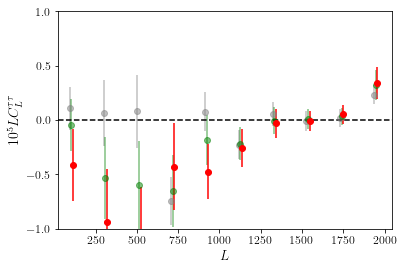

In [7]:
s = 1e5*mb.bc
pl.plot_1dstyle(ymin=-1,ymax=1,ylab=r'$10^5 LC_L^{\tau\tau}$',usetex=True,yticks=[-1.,-.5,0.,.5,1.],yticks_labsize=12,xticks_labsize=12)
for i, (bh, Lab, co, alpha) in enumerate([('normal',r'Normal','grey',.5),('lens',r'Lens-Hardening','g',.5),('lens-src',r'Lens-Source-Hardening','r',1.)]):
    al = (np.loadtxt(qobj[bh].f['TT'].al)).T[1]
    vl = al/np.sqrt(qobj[bh].l+1e-30)
    mtt, __, stt, ott = bn.binned_spec(mb,qobj[bh].f['TT'].cl[:77],cn=1,doreal=True,opt=True,vl=vl)
    n0 = (np.loadtxt(qobj[bh].f['TT'].n0bs)).T[1]
    nb = bn.binning(n0,mb,vl=vl)
    rd = np.array( [ (np.loadtxt(qobj[bh].f['TT'].rdn0[i])).T[1] for i in p.rlz[:77] ] )
    rb = bn.binning(rd,mb,vl=vl)
    # debias
    ott = ott - rb[0] - nb/(qobj[bh].mfsim)
    mtt = mtt - np.mean(rb[1:,:],axis=0) - nb/(qobj[bh].mfsim-1)
    ott = ott - mtt # subtract average of sim
    stt = stt - rb[1:,:] - nb/(qobj[bh].mfsim-1)
    vtt = np.std(stt,axis=0)
    st = ana.PTEs(ott,stt-mtt,x1pte=True)
    errorbar(mb.bc+i*10-10,s*ott,yerr=s*vtt,fmt='o',color=co,alpha=alpha,label=Lab)
axhline(0.,color='k',ls='--')
savefig('fig_tauxtau_BH.png')